In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [24]:
cd C:/Users/FS127403/OneDrive - First Solar/Desktop/Training/bengkel/project

C:\Users\FS127403\OneDrive - First Solar\Desktop\Training\bengkel\project


In [25]:
data = pd.read_csv('2P4.csv', sep = ',', parse_dates=[[0,1]], index_col=[0])

In [26]:
data

,GHI,DNI,DHI,POAI,Temp,WS,WindDirection,RH,PWat,Rain,Pressure
MM/DD/YYYY_hh:mm:ss,,,,,,,,,,,
2020-01-01 00:00:00,0.0,0,0,0.0,26.163334,1.116667,75.750001,77.850000,4.174273,0.0,1011.0
2020-01-01 00:15:00,0.0,0,0,0.0,25.900000,0.670000,60.873333,77.699999,4.103399,0.0,1011.0
2020-01-01 00:30:00,0.0,0,0,0.0,25.826667,0.866667,67.770000,77.316666,4.065895,0.0,1011.0
2020-01-01 00:45:00,0.0,0,0,0.0,25.656667,0.530000,60.416668,77.133333,4.016587,0.0,1011.0
2020-01-01 01:00:00,0.0,0,0,0.0,25.436667,0.313333,109.696666,78.000001,4.010330,0.0,1011.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:00:00,0.0,0,0,0.0,25.620000,0.326667,126.553332,83.466667,4.337176,0.0,1007.0
2020-12-31 23:15:00,0.0,0,0,0.0,25.506667,0.180000,71.326667,85.233332,4.400025,0.0,1007.0
2020-12-31 23:30:00,0.0,0,0,0.0,25.120000,0.306667,159.626668,86.300003,4.356365,0.0,1007.0


Notes:

GHI : Global horizontal irradiance

DNI : Direct Normal Irradiance

DHI : Diffused Horizontal Irradiance

POAI : point-of-array irradiance

Temp : Temperature

WS : Wind speed

WindDirection : Wind direction

RH : Relative humidity

PWat : unknown

Rain : Rain (mm)

Pressure : Pressure

In [27]:
data

,GHI,DNI,DHI,POAI,Temp,WS,WindDirection,RH,PWat,Rain,Pressure
MM/DD/YYYY_hh:mm:ss,,,,,,,,,,,
2020-01-01 00:00:00,0.0,0,0,0.0,26.163334,1.116667,75.750001,77.850000,4.174273,0.0,1011.0
2020-01-01 00:15:00,0.0,0,0,0.0,25.900000,0.670000,60.873333,77.699999,4.103399,0.0,1011.0
2020-01-01 00:30:00,0.0,0,0,0.0,25.826667,0.866667,67.770000,77.316666,4.065895,0.0,1011.0
2020-01-01 00:45:00,0.0,0,0,0.0,25.656667,0.530000,60.416668,77.133333,4.016587,0.0,1011.0
2020-01-01 01:00:00,0.0,0,0,0.0,25.436667,0.313333,109.696666,78.000001,4.010330,0.0,1011.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:00:00,0.0,0,0,0.0,25.620000,0.326667,126.553332,83.466667,4.337176,0.0,1007.0
2020-12-31 23:15:00,0.0,0,0,0.0,25.506667,0.180000,71.326667,85.233332,4.400025,0.0,1007.0
2020-12-31 23:30:00,0.0,0,0,0.0,25.120000,0.306667,159.626668,86.300003,4.356365,0.0,1007.0


In [28]:
# Drop unknown column
data = data.drop(columns=['PWat'])

In [29]:
from datetime import datetime
from pytz import timezone
import pytz

In [30]:
data.describe()

,GHI,DNI,DHI,POAI,Temp,WS,WindDirection,RH,Rain,Pressure
count,35137.000000,35137.0,35137.0,35137.000000,35137.000000,35137.000000,35137.000000,35137.000000,35137.000000,35137.000000
mean,193.857882,0.0,0.0,194.670080,25.760812,0.916747,118.645047,65.566652,0.067275,988.214802
std,291.558579,0.0,0.0,293.934279,7.573351,0.620320,77.834926,35.869204,0.572037,133.864713
min,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.0,0.000000,24.653333,0.500000,56.659999,57.933333,0.000000,1005.000000
50%,0.000000,0.0,0.0,0.000000,26.423333,0.773333,84.893335,78.333333,0.000000,1006.000000
75%,334.133331,0.0,0.0,331.283335,29.953334,1.180000,186.200002,94.150002,0.000000,1007.666667
max,1440.333333,0.0,0.0,1248.333333,37.426666,4.833333,321.800008,99.966667,14.910000,1012.500000


In [31]:
data['MonthOfYear'] = data.index.strftime('%m').astype(int)
data['DayOfYear'] = data.index.strftime('%j').astype(int)
data['WeekOfYear'] = data.index.strftime('%U').astype(int)
data['TimeOfDay(h)'] = data.index.hour
data['TimeOfDay(m)'] = data.index.hour*60 + data.index.minute
data['TimeOfDay(s)'] = data.index.hour*60*60 + data.index.minute*60 + data.index.second
data.head()

,GHI,DNI,DHI,POAI,Temp,WS,WindDirection,RH,Rain,Pressure,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s)
MM/DD/YYYY_hh:mm:ss,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.0,0,0,0.0,26.163334,1.116667,75.750001,77.850000,0.0,1011.0,1,1,0,0,0,0
2020-01-01 00:15:00,0.0,0,0,0.0,25.900000,0.670000,60.873333,77.699999,0.0,1011.0,1,1,0,0,15,900
2020-01-01 00:30:00,0.0,0,0,0.0,25.826667,0.866667,67.770000,77.316666,0.0,1011.0,1,1,0,0,30,1800
2020-01-01 00:45:00,0.0,0,0,0.0,25.656667,0.530000,60.416668,77.133333,0.0,1011.0,1,1,0,0,45,2700
2020-01-01 01:00:00,0.0,0,0,0.0,25.436667,0.313333,109.696666,78.000001,0.0,1011.0,1,1,0,1,60,3600


In [32]:
grouped_m=data.groupby('MonthOfYear').mean().reset_index()
grouped_w=data.groupby('WeekOfYear').mean().reset_index()
grouped_d=data.groupby('DayOfYear').mean().reset_index()
grouped_h=data.groupby('TimeOfDay(h)').mean().reset_index()

grouped_mR=data.groupby('MonthOfYear').sum().reset_index()
grouped_wR=data.groupby('WeekOfYear').sum().reset_index()
grouped_dR=data.groupby('DayOfYear').sum().reset_index()
grouped_hR=data.groupby('TimeOfDay(h)').sum().reset_index()

In [33]:
data.describe()

,GHI,DNI,DHI,POAI,Temp,WS,WindDirection,RH,Rain,Pressure,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s)
count,35137.000000,35137.0,35137.0,35137.000000,35137.000000,35137.000000,35137.000000,35137.000000,35137.000000,35137.000000,35137.000000,35137.000000,35137.000000,35137.000000,35137.000000,35137.000000
mean,193.857882,0.0,0.0,194.670080,25.760812,0.916747,118.645047,65.566652,0.067275,988.214802,6.513504,183.494806,26.070296,11.499673,712.479722,42748.783334
std,291.558579,0.0,0.0,293.934279,7.573351,0.620320,77.834926,35.869204,0.572037,133.864713,3.451359,105.659191,15.098876,6.922458,415.687019,24941.221151
min,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.0,0.000000,24.653333,0.500000,56.659999,57.933333,0.000000,1005.000000,4.000000,92.000000,13.000000,5.000000,345.000000,20700.000000
50%,0.000000,0.0,0.0,0.000000,26.423333,0.773333,84.893335,78.333333,0.000000,1006.000000,7.000000,183.000000,26.000000,11.000000,705.000000,42300.000000
75%,334.133331,0.0,0.0,331.283335,29.953334,1.180000,186.200002,94.150002,0.000000,1007.666667,10.000000,275.000000,39.000000,17.000000,1065.000000,63900.000000
max,1440.333333,0.0,0.0,1248.333333,37.426666,4.833333,321.800008,99.966667,14.910000,1012.500000,12.000000,366.000000,52.000000,23.000000,1425.000000,85500.000000


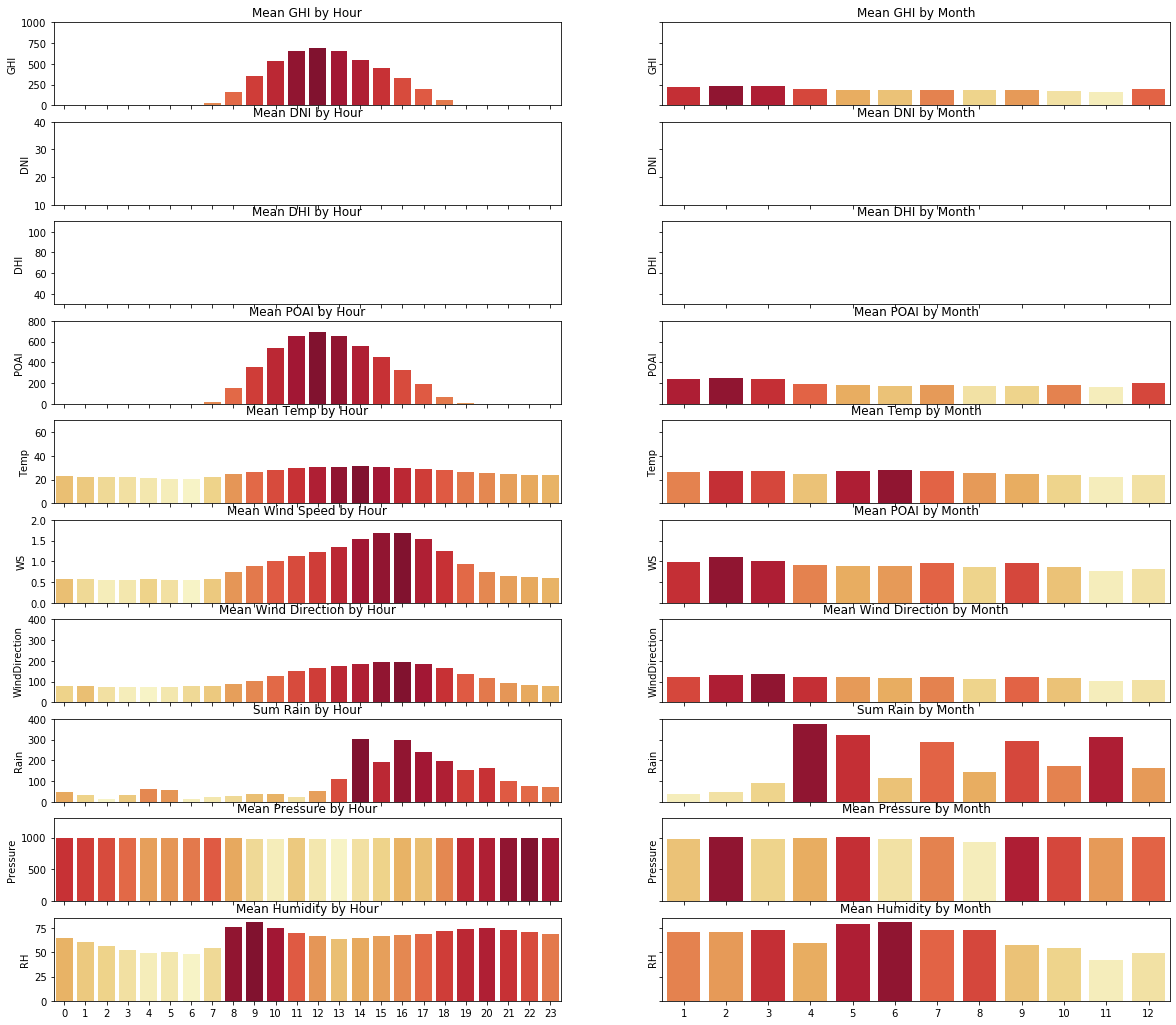

In [34]:
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14), (ax15, ax16), (ax17,ax18), (ax19,ax20)) = plt.subplots(10, 2, sharex='col', sharey='row', figsize=(20,18))
ax1.set_ylim(0,1000)
ax3.set_ylim(10,40)
ax5.set_ylim(30,110)
ax7.set_ylim(0,800)
ax9.set_ylim(0,70)
ax11.set_ylim(0,2)
ax13.set_ylim(0,400)
ax15.set_ylim(0,400)
ax17.set_ylim(0,1300)

ax1.set_title('Mean GHI by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['GHI'].argsort().argsort() 
g = sns.barplot(x='TimeOfDay(h)', y='GHI', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax1)
ax1.set_xlabel('')


ax2.set_title('Mean GHI by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['GHI'].argsort().argsort() 
g = sns.barplot(x='MonthOfYear', y='GHI', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax2)
ax2.set_xlabel('')
                
                
ax3.set_title('Mean DNI by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['DNI'].argsort().argsort() 
g = sns.barplot(x='TimeOfDay(h)', y='DNI', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax3)
ax3.set_xlabel('')

ax4.set_title('Mean DNI by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['DNI'].argsort().argsort() 
g = sns.barplot(x='MonthOfYear', y='DNI', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax4)
ax4.set_xlabel('')

ax5.set_title('Mean DHI by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['DHI'].argsort().argsort() 
g = sns.barplot(x='TimeOfDay(h)', y='DHI', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax5)
ax5.set_xlabel('')

ax6.set_title('Mean DHI by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['DHI'].argsort().argsort() 
g = sns.barplot(x='MonthOfYear', y='DHI', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax6)
ax6.set_xlabel('')

ax7.set_title('Mean POAI by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['POAI'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='POAI', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax7)
ax7.set_xlabel('')

ax8.set_title('Mean POAI by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['POAI'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='POAI', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax8)
ax8.set_xlabel('')

ax9.set_title('Mean Temp by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Temp'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Temp', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax9)
ax9.set_xlabel('')

ax10.set_title('Mean Temp by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Temp'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Temp', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax10)
ax10.set_xlabel('')

ax11.set_title('Mean Wind Speed by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['WS'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='WS', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax11)
ax11.set_xlabel('')

ax12.set_title('Mean POAI by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['WS'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='WS', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax12)
ax12.set_xlabel('')

ax13.set_title('Mean Wind Direction by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['WindDirection'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='WindDirection', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax13)
ax13.set_xlabel('')

ax14.set_title('Mean Wind Direction by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['WindDirection'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='WindDirection', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax14)
ax14.set_xlabel('')

ax15.set_title('Sum Rain by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Rain'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Rain', data=grouped_hR, palette=np.array(pal[::-1])[rank], ax=ax15)
ax15.set_xlabel('')

ax16.set_title('Sum Rain by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Rain'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Rain', data=grouped_mR, palette=np.array(pal[::-1])[rank], ax=ax16)
ax16.set_xlabel('')

ax17.set_title('Mean Pressure by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Pressure'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Pressure', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax17)
ax17.set_xlabel('')

ax18.set_title('Mean Pressure by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Pressure'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Pressure', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax18)
ax18.set_xlabel('')

ax19.set_title('Mean Humidity by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['RH'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='RH', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax19)
ax19.set_xlabel('')

ax20.set_title('Mean Humidity by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['RH'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='RH', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax20)
ax20.set_xlabel('')

plt.show()

In [35]:
# remove extreme value

data.loc[data['GHI'] > 1400,'GHI'] = 1400

In [36]:
data.describe()

,GHI,DNI,DHI,POAI,Temp,WS,WindDirection,RH,Rain,Pressure,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s)
count,35137.000000,35137.0,35137.0,35137.000000,35137.000000,35137.000000,35137.000000,35137.000000,35137.000000,35137.000000,35137.000000,35137.000000,35137.000000,35137.000000,35137.000000,35137.000000
mean,193.855937,0.0,0.0,194.670080,25.760812,0.916747,118.645047,65.566652,0.067275,988.214802,6.513504,183.494806,26.070296,11.499673,712.479722,42748.783334
std,291.550416,0.0,0.0,293.934279,7.573351,0.620320,77.834926,35.869204,0.572037,133.864713,3.451359,105.659191,15.098876,6.922458,415.687019,24941.221151
min,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.0,0.000000,24.653333,0.500000,56.659999,57.933333,0.000000,1005.000000,4.000000,92.000000,13.000000,5.000000,345.000000,20700.000000
50%,0.000000,0.0,0.0,0.000000,26.423333,0.773333,84.893335,78.333333,0.000000,1006.000000,7.000000,183.000000,26.000000,11.000000,705.000000,42300.000000
75%,334.133331,0.0,0.0,331.283335,29.953334,1.180000,186.200002,94.150002,0.000000,1007.666667,10.000000,275.000000,39.000000,17.000000,1065.000000,63900.000000
max,1400.000000,0.0,0.0,1248.333333,37.426666,4.833333,321.800008,99.966667,14.910000,1012.500000,12.000000,366.000000,52.000000,23.000000,1425.000000,85500.000000


In [37]:
data.to_csv(r'C:/Users/FS127403/OneDrive - First Solar/Desktop/Training/bengkel/project/clean.csv')